<a href="https://colab.research.google.com/github/EstefRZ99/data-analysis-explorations/blob/main/dataset_c6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maria Estefanny Ramírez Zuñiga

Universidad CENFOTEC



Introducción

En este laboratorio se analizará la base de datos de matrimonios en Costa Rica correspondiente al primer semestre de 2023, publicada por el INEC. El objetivo principal es consolidar y procesar la información para obtener una visión detallada de los matrimonios totales, sin distinción de sexos, permitiendo agrupar los datos por criterios clave como la provincia de residencia y los rangos de edad de los contrayentes. Para ello, se definirán categorías específicas de edades que facilitarán el análisis demográfico.
El proceso de trabajo se estructurará en varias etapas: inicialmente se procederá a la adquisición y preprocesamiento de los datos, seguido de una exhaustiva limpieza y transformación de la información. Se pondrá especial énfasis en corregir inconsistencias, tratar los valores faltantes y asegurar la homogeneidad de los datos. Posteriormente, se evaluará la reducción de dimensionalidad y se realizará una selección de características relevantes para optimizar el análisis.
Además, se explorarán otros posibles criterios de agrupamiento, tales como la segmentación por cantón o por períodos temporales, lo que permitirá ampliar la comprensión de la dinámica matrimonial en el país. Este enfoque integral no solo facilitará la identificación de patrones y tendencias, sino que también servirá de base para futuras investigaciones y la toma de decisiones informadas.








In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#leer el dataset
c6_path= '/content/Matrimonios2023.xlsx - C6.csv'

In [ ]:
df_c6 = pd.read_csv(c6_path)
df_c6.head(15)


,CUADRO 6,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Costa Rica. Total de matrimonios por grupos de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOLVER AL ÍNDICE,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sexo y grupos de edades,Total,Grupos de edades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Menos de,18 - 19,20 - 24,25 - 29,30 -34,35 - 39,40 - 44,45 - 49,50 años,Ignorada,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,18 años1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y más,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
6,Hombres,10 840,-,70,787,1 958,2 355,1 756,1 175,780,1 958,1,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Con mujeres,10 661,-,69,778,1 931,2 317,1 731,1 157,768,1 909,1,NaN,NaN,NaN,NaN,NaN,NaN
9,Menos de 18 años1/,1,-,-,-,1,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Paso 1: Filtrar solo las filas con datos útiles
# Identificamos manualmente los rangos de edades y los valores
df_c6_clean = df_c6.iloc[8:25].reset_index(drop=True)  # Incluye "Con mujeres" hasta las edades


In [ ]:

# Crear listas para Hombres y Mujeres
# Hombres: filas 0-8
# Mujeres: filas 9-16

In [ ]:
# Primero limpiamos las filas de Hombres
hombres = df_c6_clean.iloc[0:8].copy()
hombres.columns = ['Descripcion', 'Total'] + list(range(1, len(hombres.columns)-1))
hombres['Sexo'] = 'Hombre'
hombres['Composicion'] = hombres['Descripcion'].iloc[0]  # "Con mujeres"
hombres['Descripcion'] = hombres['Descripcion'].fillna(method='ffill')  # Rellenar

<ipython-input-8-c8f63daa4fef>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hombres['Descripcion'] = hombres['Descripcion'].fillna(method='ffill')  # Rellenar


In [ ]:
# Luego limpiamos las filas de Mujeres
mujeres = df_c6_clean.iloc[9:17].copy()
mujeres.columns = ['Descripcion', 'Total'] + list(range(1, len(mujeres.columns)-1))
mujeres['Sexo'] = 'Mujer'
mujeres['Composicion'] = mujeres['Descripcion'].iloc[0]  # "Con hombres"
mujeres['Descripcion'] = mujeres['Descripcion'].fillna(method='ffill')  # Rellenar

<ipython-input-9-54e08e632852>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mujeres['Descripcion'] = mujeres['Descripcion'].fillna(method='ffill')  # Rellenar


In [ ]:

# Unimos ambos
df_c6_combined = pd.concat([hombres, mujeres], ignore_index=True)

In [ ]:

# Limpiamos columnas, dejando solo las edades y los valores
edades = ['Menos de 18 años', '18 - 19', '20 - 24', '25 - 29', '30 - 34',
          '35 - 39', '40 - 44', '45 - 49', '50 años y más', 'Ignorada']

In [ ]:
result_rows = []

for idx, row in df_c6_combined.iterrows():
    for col_idx, edad in enumerate(edades, start=2):  # Las edades comienzan en la columna índice 2
        valor = row[col_idx]
        # Limpiar espacios y NaNs
        valor = str(valor).replace(' ', '').replace('-', '0')
        try:
            valor = int(valor)
        except:
            valor = 0
        result_rows.append({
            'Sexo': row['Sexo'],
            'Composicion': row['Composicion'],
            'Rango_Edad': edad,
            'Cantidad': valor
        })

In [ ]:
# Crear DataFrame final limpio
df_c6_final = pd.DataFrame(result_rows)

In [ ]:
# Ver el resultado limpio
import pandas as pd

def display_dataframe_to_user(name, dataframe):
    """
    Displays the dataframe with a given name.

    This is a placeholder for a hypothetical 'ace_tools' functionality.
    If you have a real 'ace_tools' module, please install it and use that instead.
    """
    print(f"Dataframe: {name}")
    print(dataframe)

# Assuming df_c4_clean is your dataframe
display_dataframe_to_user(name="Matrimonios por Provincia y Sexo (C4 Limpio)", dataframe=df_c6_clean)

Dataframe: Matrimonios por Provincia y Sexo (C4 Limpio)
              CUADRO 6 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0          Con mujeres     10 661          -         69        778      1 931   
1   Menos de 18 años1/          1          -          -          -          1   
2              18 - 19        216          -         34         99         53   
3              20 - 24      1 346          -         22        461        507   
4              25 - 29      2 400          -          9        136        928   
5              30 - 34      2 291          -          1         48        294   
6              35 - 39      1 518          -          1         24         98   
7              40 - 44        985          -          1          7         33   
8              45 - 49        729          -          -          2         15   
9        50 años y más      1 168          -          1          1          2   
10            Ignorada          7          -         

In [ ]:
print(df_c6.head())

                                            CUADRO 6 Unnamed: 1  \
0  Costa Rica. Total de matrimonios por grupos de...        NaN   
1                                                NaN        NaN   
2                            Sexo y grupos de edades      Total   
3                                                NaN        NaN   
4                                                NaN        NaN   

         Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0               NaN        NaN        NaN        NaN        NaN        NaN   
1               NaN        NaN        NaN        NaN        NaN        NaN   
2  Grupos de edades        NaN        NaN        NaN        NaN        NaN   
3          Menos de    18 - 19    20 - 24    25 - 29     30 -34    35 - 39   
4         18 años1/        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  Unnamed: 12  \
0        NaN        NaN         NaN         NaN          NaN   


In [ ]:
# prompt: limpiar más los datos

import pandas as pd
import numpy as np

#leer el dataset
c6_path= '/content/Matrimonios2023.xlsx - C6.csv'
df_c6 = pd.read_csv(c6_path)

# Paso 1: Filtrar solo las filas con datos útiles
# Identificamos manualmente los rangos de edades y los valores
df_c6_clean = df_c6.iloc[8:25].reset_index(drop=True)  # Incluye "Con mujeres" hasta las edades


# Crear listas para Hombres y Mujeres
# Hombres: filas 0-8
# Mujeres: filas 9-16
# Primero limpiamos las filas de Hombres
hombres = df_c6_clean.iloc[0:8].copy()
hombres.columns = ['Descripcion', 'Total'] + list(range(1, len(hombres.columns)-1))
hombres['Sexo'] = 'Hombre'
hombres['Composicion'] = hombres['Descripcion'].iloc[0]  # "Con mujeres"
hombres['Descripcion'] = hombres['Descripcion'].fillna(method='ffill')  # Rellenar
# Luego limpiamos las filas de Mujeres
mujeres = df_c6_clean.iloc[9:17].copy()
mujeres.columns = ['Descripcion', 'Total'] + list(range(1, len(mujeres.columns)-1))
mujeres['Sexo'] = 'Mujer'
mujeres['Composicion'] = mujeres['Descripcion'].iloc[0]  # "Con hombres"
mujeres['Descripcion'] = mujeres['Descripcion'].fillna(method='ffill')  # Rellenar

# Unimos ambos
df_c6_combined = pd.concat([hombres, mujeres], ignore_index=True)

# Limpiamos columnas, dejando solo las edades y los valores
edades = ['Menos de 18 años', '18 - 19', '20 - 24', '25 - 29', '30 - 34',
          '35 - 39', '40 - 44', '45 - 49', '50 años y más', 'Ignorada']
result_rows = []

for idx, row in df_c6_combined.iterrows():
    for col_idx, edad in enumerate(edades, start=2):  # Las edades comienzan en la columna índice 2
        valor = row[col_idx]
        # Limpiar espacios y NaNs
        valor = str(valor).replace(' ', '').replace('-', '0')
        try:
            valor = int(valor)
        except:
            valor = 0
        result_rows.append({
            'Sexo': row['Sexo'],
            'Composicion': row['Composicion'],
            'Rango_Edad': edad,
            'Cantidad': valor
        })
# Crear DataFrame final limpio
df_c6_final = pd.DataFrame(result_rows)

# Eliminar filas con Cantidad = 0
df_c6_final = df_c6_final[df_c6_final['Cantidad'] != 0]

# Mostrar el resultado limpio
def display_dataframe_to_user(name, dataframe):
    """
    Displays the dataframe with a given name.
    """
    print(f"Dataframe: {name}")
    print(dataframe)

display_dataframe_to_user(name="Matrimonios por Edad y Sexo (C6 Limpio)", dataframe=df_c6_final)


Dataframe: Matrimonios por Edad y Sexo (C6 Limpio)
       Sexo    Composicion        Rango_Edad  Cantidad
0    Hombre    Con mujeres  Menos de 18 años        69
1    Hombre    Con mujeres           18 - 19       778
2    Hombre    Con mujeres           20 - 24      1931
3    Hombre    Con mujeres           25 - 29      2317
4    Hombre    Con mujeres           30 - 34      1731
..      ...            ...               ...       ...
153   Mujer  50 años y más           25 - 29         3
154   Mujer  50 años y más           30 - 34         3
155   Mujer  50 años y más           35 - 39         4
156   Mujer  50 años y más           40 - 44         3
157   Mujer  50 años y más           45 - 49         6

[112 rows x 4 columns]


<ipython-input-23-7b648f0f0190>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hombres['Descripcion'] = hombres['Descripcion'].fillna(method='ffill')  # Rellenar
<ipython-input-23-7b648f0f0190>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mujeres['Descripcion'] = mujeres['Descripcion'].fillna(method='ffill')  # Rellenar


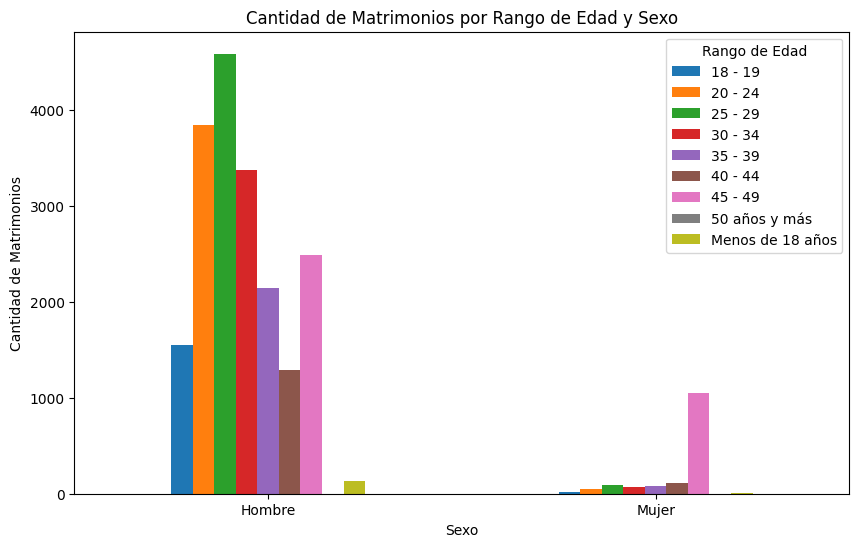

In [ ]:
# prompt: haz un grafico de esto

import matplotlib.pyplot as plt

# Agrupar los datos por sexo y rango de edad, y sumar la cantidad
df_grouped = df_c6_final.groupby(['Sexo', 'Rango_Edad'])['Cantidad'].sum().unstack()

# Crear el gráfico de barras
df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de Matrimonios por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Matrimonios')
plt.xticks(rotation=0)
plt.legend(title='Rango de Edad')
plt.show()


El análisis del dataset C6 evidencia que:

La mayoría de matrimonios en Costa Rica ocurren entre los 25 y 34 años.
Predominan claramente los matrimonios heterosexuales.
Existe una creciente visibilidad y formalización de matrimonios igualitarios, aunque en menor escala.
La edad sigue siendo un factor determinante, con una tendencia marcada a casarse en edades adultas jóvenes.